<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>


# SAOP09 - Data Science For Business
## Prof. Eduardo Pécora

# Regressão Linear Múltipla
Tempo estimado: **30** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Criar um modelo de regressão linear Múltipla
* Calcular o erro R^2
* Calcular o MAE, MAPE, MSE e RMSE

## Bibliotecas

In [12]:
# importando a biblioteca pandas para manipulação de dados
import pandas as pd

# Iportando numpy para criar, manipular e operar em arrays multidimensionais, bem como para realizar operações matemáticas avançadas.
import numpy as np

# Importando a biblioteca math que fornece funções matemáticas básicas
import math 

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# Importando a classe LinearRegression do sklearn 
# Essa classe implementa uma versão da regressão linear simples ou múltipla
# Usado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline

## Obtendo dados

In [13]:
# O objeto ainda está vazio. 
caminho = "" 

# Caminho do arquivo csv
caminho = "https://raw.githubusercontent.com/EduPekUfpr/PythonProject/refs/heads/main/Dados/MeuAutoLimpo.csv" 

#Obtendo arquivo e passando-o para um dataframe
df = pd.read_csv(caminho) 

## Regressão Linear Múltipla

### Revisando

$$
    X_k : Variáveis \ independentes \\
    Y : Variável \ dependente
$$

**Função Linear**
$$
    Yhat = \alpha + \beta_1  X_1 \ + \ \beta_2  X_2 \ + \ ... + \ \beta_k  X_k
$$

* a : se refere ao intercepto da regressão linear, ou seja, o valor de Y quando todos X são 0.
* b1, b2, bk : são os coeficientes de regressão, que representam a influência de cada variável X independente em Yhat

### Implementação

<p>Vamos desenvolver um modelo utilizando as seguintes variáveis como preditoras.</p>
<ul>
    <li>engine-size</li>
    <li>curb-weight</li>
</ul>

<p> Mas porque tais variáveis? Alta correlação

In [14]:
numerics = ['int', 'float']
df = df.select_dtypes(include=numerics)
df.corr()['price'].sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809681
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543154
normalized-losses    0.136136
height               0.135486
stroke               0.082267
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101542
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

In [15]:
# Criando um objeto para regressão
lm = LinearRegression()
lm

LinearRegression()

In [16]:
# Ajustando o novo dataframe
df_linear_multipla = df[['price','engine-size', 'curb-weight']].copy(deep=True)

# Criando as novas variáveis
X = df_linear_multipla[['engine-size', 'curb-weight']]
Y = df_linear_multipla['price']

# Carregando o modelo
lm.fit(X, Y)

# Exibindo o R^2
R2=lm.score(X,Y)

print("SCORE: %.4f" % R2)

SCORE: 0.7925


* Calcular os valores previstos:

In [17]:
#Fazendo a predição dos dados

YHatLinMult = lm.predict(X)

# Carregando os valores previstos para o dataframe
df_linear_multipla.loc[:,'YHat'] = YHatLinMult

# Visualizando as primeiras linhas do dataframe
df_linear_multipla.head(5)

,price,engine-size,curb-weight,YHat
0,13495.0,130,2548,13518.460484
1,16500.0,130,2548,13518.460484
2,16500.0,152,2823,17408.285548
3,13950.0,109,2337,10071.195012
4,17450.0,136,2824,15616.518408


In [18]:
# Analisando a estatística descritiva
df_linear_multipla[['price','YHat']].describe()

,price,YHat
count,201.000000,201.000000
mean,13207.129353,13207.129353
std,7947.066342,7074.473145
min,5118.000000,299.418692
25%,7775.000000,7819.251662
50%,10295.000000,11484.756825
75%,16500.000000,16838.561468
max,45400.000000,42765.395070


### Comparando Previsto x Real

Vamos usar o recurso gráfico para visualizar esse erro.

Text(45000, 3.3e-05, 'SCORE: 0.792455')

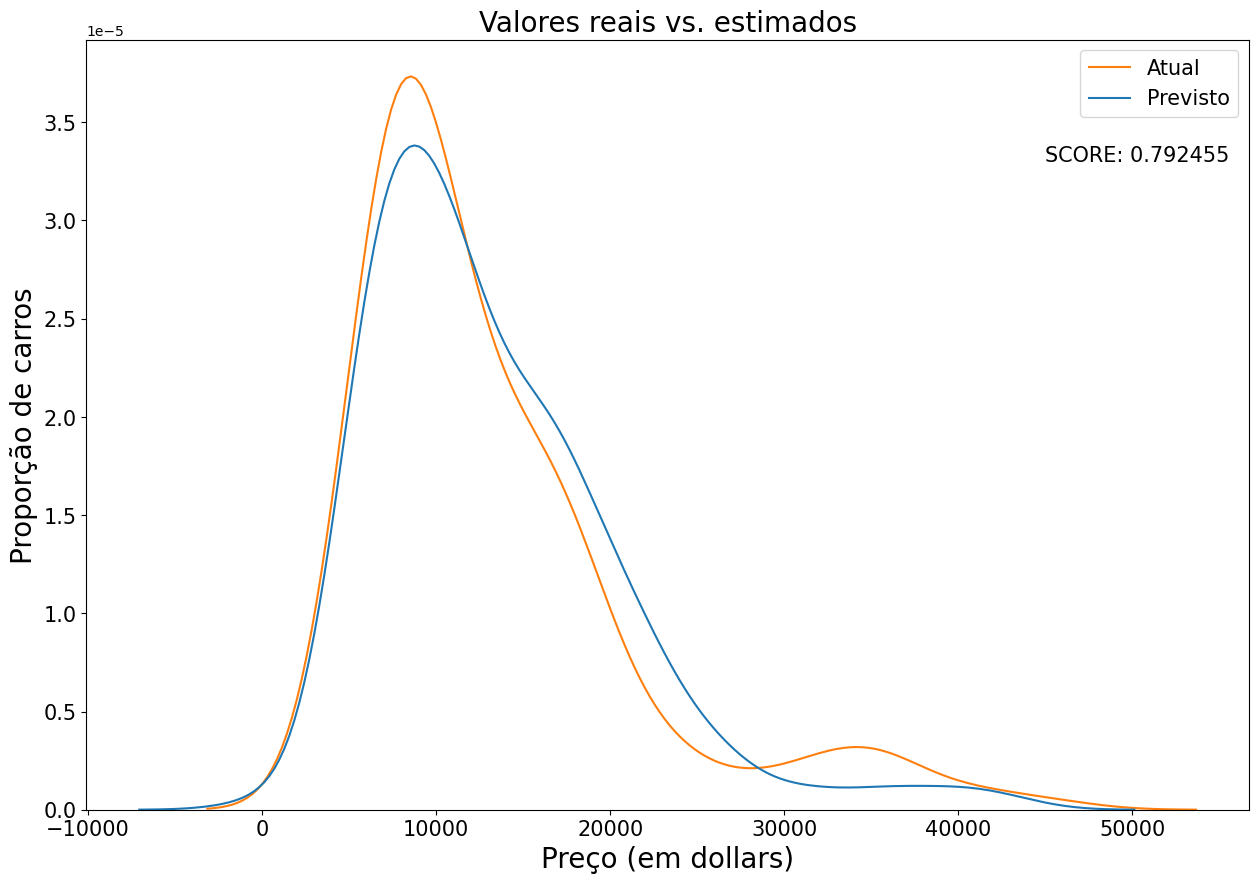

In [19]:
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_linear_multipla[['YHat','price']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %4f" % R2

plt.text(45000, 0.000033, tt, size = 15)

### Cálculo dos erros

Text(0.5, 0, 'Resíduo (em dollars)')

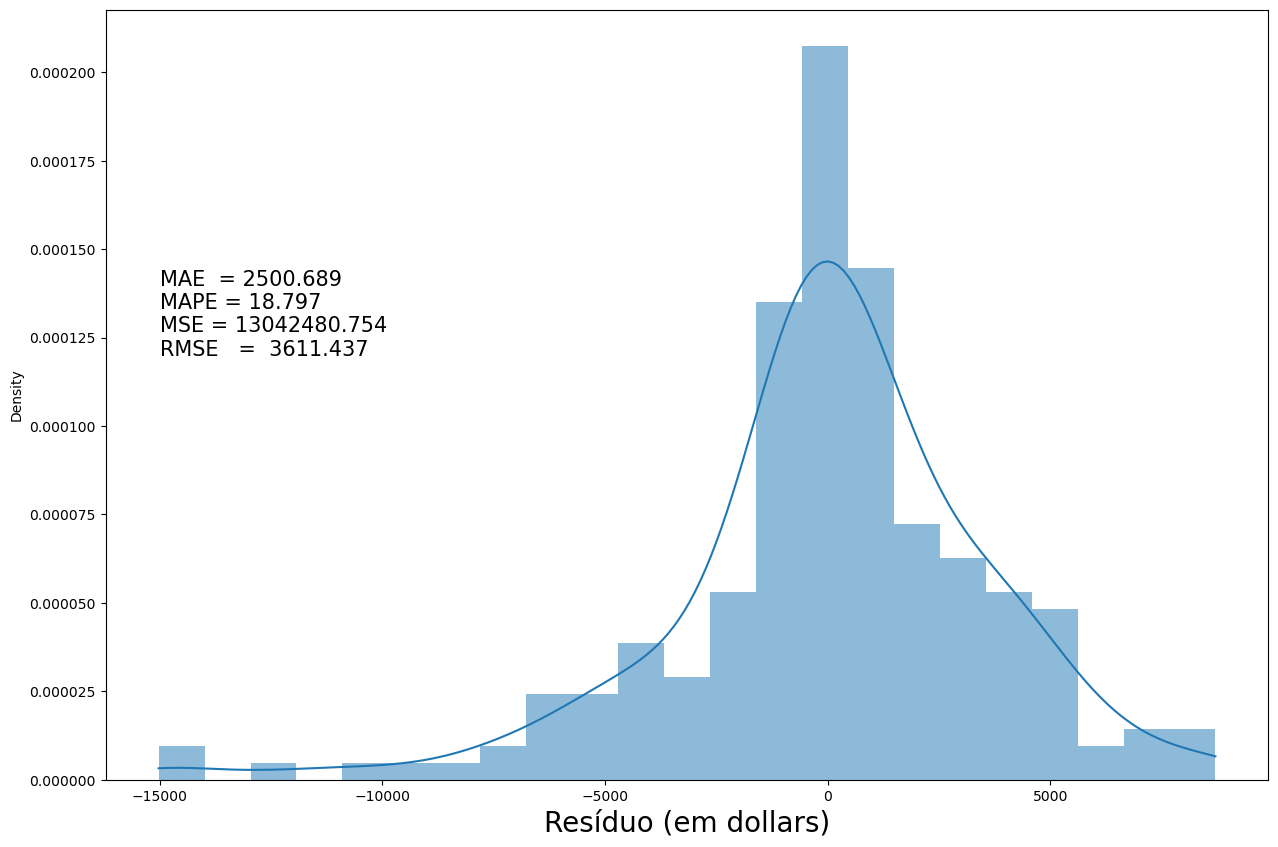

In [20]:
# Erro
df_linear_multipla.loc[:,'Deviation'] = df_linear_multipla['YHat']-df_linear_multipla['price']

y_train = df_linear_multipla['price']
y_pred  = df_linear_multipla['YHat']

mae = mean_absolute_error(y_train, y_pred)
mape = 100*mean_absolute_percentage_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

plt.figure(figsize=(15, 10))

tt = "MAE  = %.3f \nMAPE = %.3f \nMSE = %.3f \nRMSE   =  %.3f" % (mae, mape, mse, rmse)

sns.histplot(x=df_linear_multipla['Deviation'], kde=True, stat="density", linewidth=0)
plt.text(-15000, 0.00012, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)

## Mostrando o hiperplano (apenas para fins didáticos)

Text(0.5, 0, 'Price')

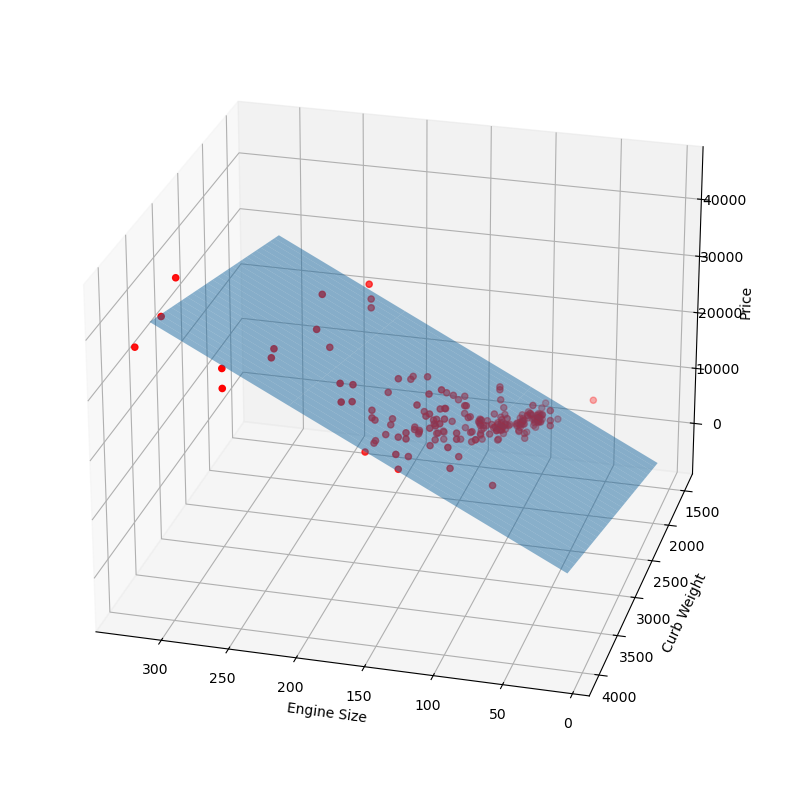

In [21]:
# O intervalo entre os pontos da malha de pontos
mesh_size = 100

# Margem do da área de plotagem
margin = 50

# Valores mínimos e máximos da malha
x_min, x_max = X['engine-size'].min() - margin, X['engine-size'].max() + margin
y_min, y_max = X['curb-weight'].min() - margin, X['curb-weight'].max() + margin

# A função arrange cria uma sequencia com base no menor e maior valor espaçados igualmente pelo mash_size
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)

# A função meshgrid cria uma grade de pontos bidimensional com base nos pontos de xrange yrange
xx, yy = np.meshgrid(xrange, yrange)

# ravel() retorna uma matriz achatada (unidimensional) com todos os elementos da matriz original em sequência.
# column_stack() empilha as matrizes unidimensionais em colunas, criando assim uma nova matriz bidimensional.
X_pred = np.column_stack((xx.ravel(), yy.ravel()))

## criando um dataframe
X_pred = pd.DataFrame(X_pred, columns=['engine-size', 'curb-weight'])

# fazer a previsão de Y com base na malha com os pontos criados
Y_pred = lm.predict(X_pred)

# Criando a área do gráfico
fig = plt.figure(figsize=(20,10))

# Criando um subplot do tipo 3d
ax = fig.add_subplot(111, projection='3d')

# Criando um gráfico de dispersão de pontos 
ax.scatter(X['engine-size'], X['curb-weight'], Y, c='r', marker='o')

# Transformando novamente os valores preditos no shape bidmensional
Z = Y_pred.reshape(xx.shape)

# Criando o gráfico de superfície
ax.plot_surface(xx, yy, Z , alpha=0.5)
ax.view_init(25, 105)

# Passando rótulos dos eixos
ax.set_xlabel('Engine Size')
ax.set_ylabel('Curb Weight')
ax.set_zlabel('Price')

## Fique Conectado

- [![YouTube](https://img.icons8.com/ios-filled/40/000000/youtube-play.png)](https://www.youtube.com/@LigaDataScience/videos)  
  Explore nossos vídeos educacionais e webinars sobre ciência de dados, machine learning e inteligência artificial. Inscreva-se para não perder nenhuma atualização!

- [![LinkedIn](https://img.icons8.com/ios-filled/40/000000/linkedin.png)](https://www.linkedin.com/company/liga-data-science-ufpr/)  
  Siga-nos no LinkedIn para as últimas novidades, oportunidades de carreira e networking profissional no campo da ciência de dados.

- [![Instagram](https://img.icons8.com/ios-filled/40/000000/instagram-new.png)](https://www.instagram.com/ligadatascience/)  
  Confira nosso Instagram para conteúdos dos bastidores, destaques de eventos e o dia a dia da Liga Data Science. Faça parte da nossa jornada!

## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>, <a href="https://www.linkedin.com/in/hesauhugocavalcanti/" target="_blank">Hesau Hugo</a> , <a href="https://www.linkedin.com/in/joão-gabriel-santin-botelho/" target="_blank">João Gabriel</a>

## Referências:

Traduzido e inspirado do material desenvolviedo pela IBM:
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

* Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>
* Documentação da biblioteca <a href="https://seaborn.pydata.org/">Seaborn</a>
* Documentação do biblioteca <a href="https://matplotlib.org/">Matplotlib</a>
* Documentação do biblioteca <a href="https://numpy.org/devdocs/reference/index.html">Numpy</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
| 04-04-2021       | 1.0     | Eduardo Pecora    | Inicial               |
| 03-11-2021       | 1.1     | Eduardo Pecora    | Estrutura Aula        |
| 08-03-2022       | 1.2     | Eduardo Pecora    | GitHub                |
| 17-04-2023       | 1.3     | Hesau Hugo        | Reestruturação        |
| 18-09-2024       | 1.4     | João Gabriel      | Atualização           |